In [25]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [26]:
data = pd.read_csv('SM1_data.csv')
data=data.set_index('Date')
data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
train = data.loc[data.index <'2017-01-01']
test = data.loc[(data.index >= '2017-01-01') & (data.index < '2021-01-01')]



----At 10cm ddepth----


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 182.3025 - mae: 9.1836 - val_loss: 18.7618 - val_mae: 2.9865
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.8061 - mae: 3.0426 - val_loss: 15.9046 - val_mae: 2.9104
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16.9929 - mae: 2.9023 - val_loss: 16.8256 - val_mae: 2.8681
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 15.9257 - mae: 2.7877 - val_loss: 16.8677 - val_mae: 3.0663
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.9640 - mae: 2.7139 - val_loss: 18.1779 - val_mae: 3.1982
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.8562 - mae: 2.6560 - val_loss: 16.8209 - val_mae: 3.0446
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 14.1867 - mae: 2.6068 - val_loss: 16.3945 - val_mae: 3.0126
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.4955 - mae: 2.6210 - val_loss: 16.0909 - val_mae: 2.8827
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━

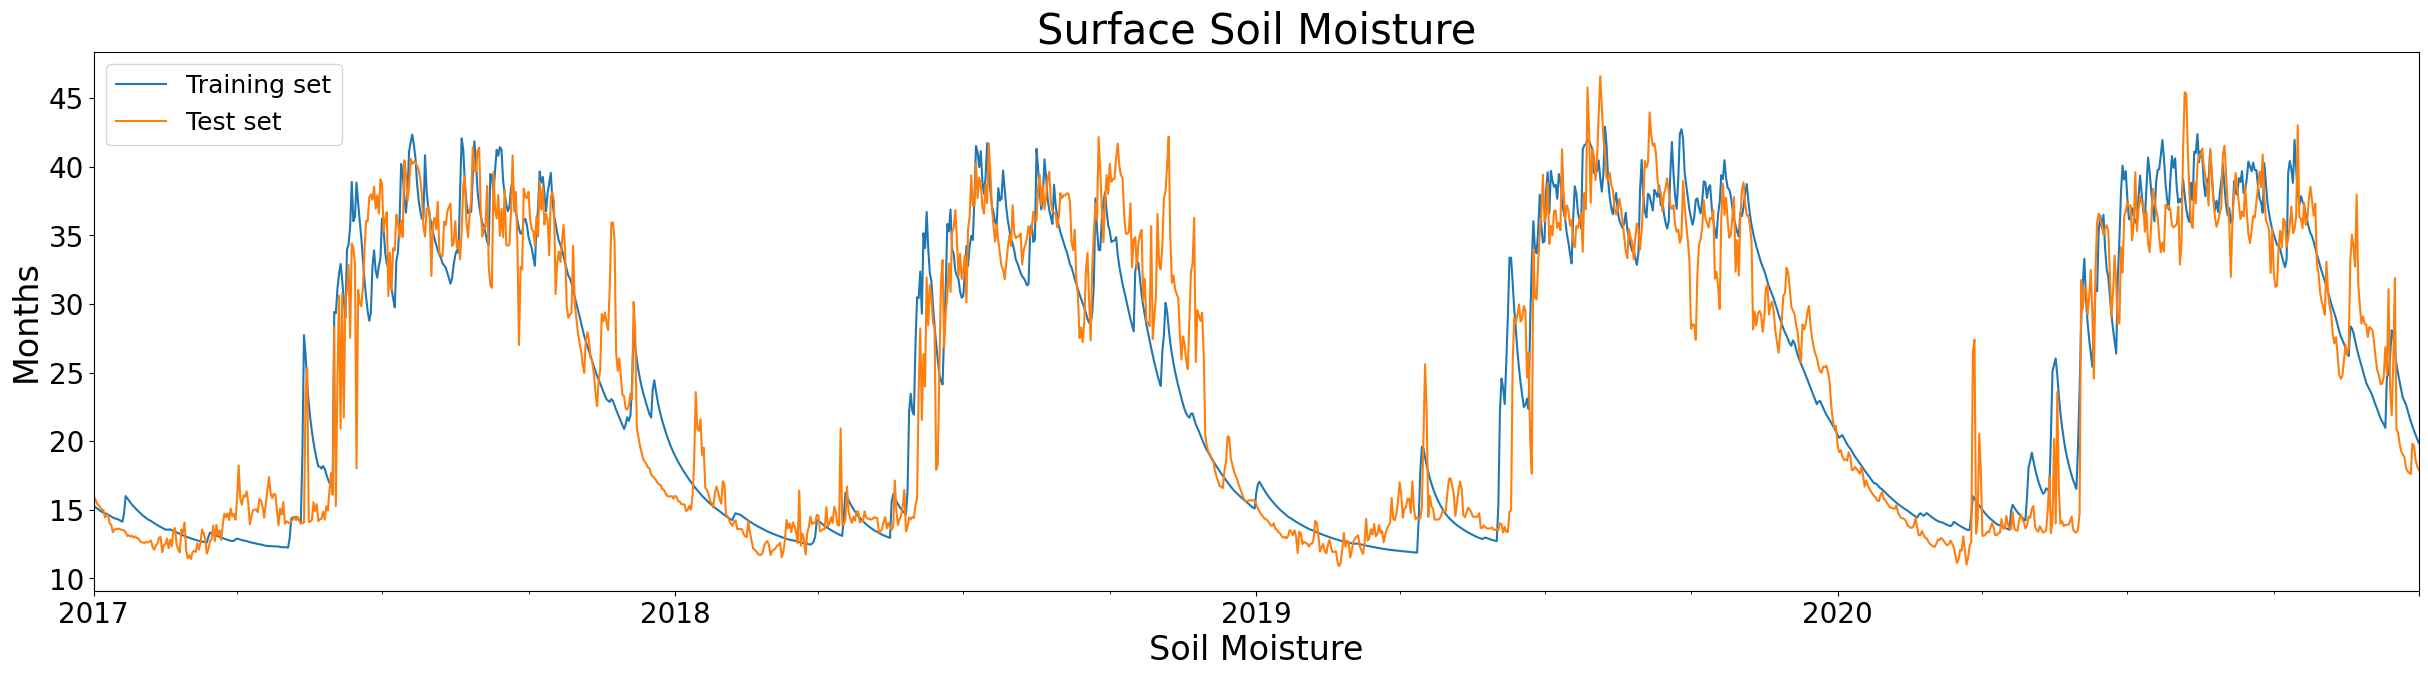

In [27]:
print("----At 10cm ddepth----")

X_train=train[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_train = train['SM10']
X_test=test[[ 'Rain','St10', 'Air_Temperature','ref40']]
Y_test = test['SM10']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

fig,ax = plt.subplots(figsize=(30,7))
test['SM10'].plot(ax=ax,label='Observed surface soil moisture')
SMP_series.plot(ax=ax,label='predicted surface soil moisture')
#ax.axvline('2019-01-01',color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=30)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Surface Soil Moisture')
plt.show()


----At 30cm ddepth----


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 155.6068 - mae: 7.9521 - val_loss: 2.9806 - val_mae: 1.2176
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7661 - mae: 0.9417 - val_loss: 2.6514 - val_mae: 1.0934
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6704 - mae: 0.9386 - val_loss: 2.5219 - val_mae: 1.0778
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6381 - mae: 0.9144 - val_loss: 2.5363 - val_mae: 1.0818
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6159 - mae: 0.8965 - val_loss: 2.4232 - val_mae: 1.1379
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7363 - mae: 0.9675 - val_loss: 2.6394 - val_mae: 1.0902
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6926 - mae: 0.9232 - val_loss: 2.6272 - val_mae: 1.0485
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6518 - mae: 0.9230 - val_loss: 2.4588 - val_mae: 1.0652
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - 

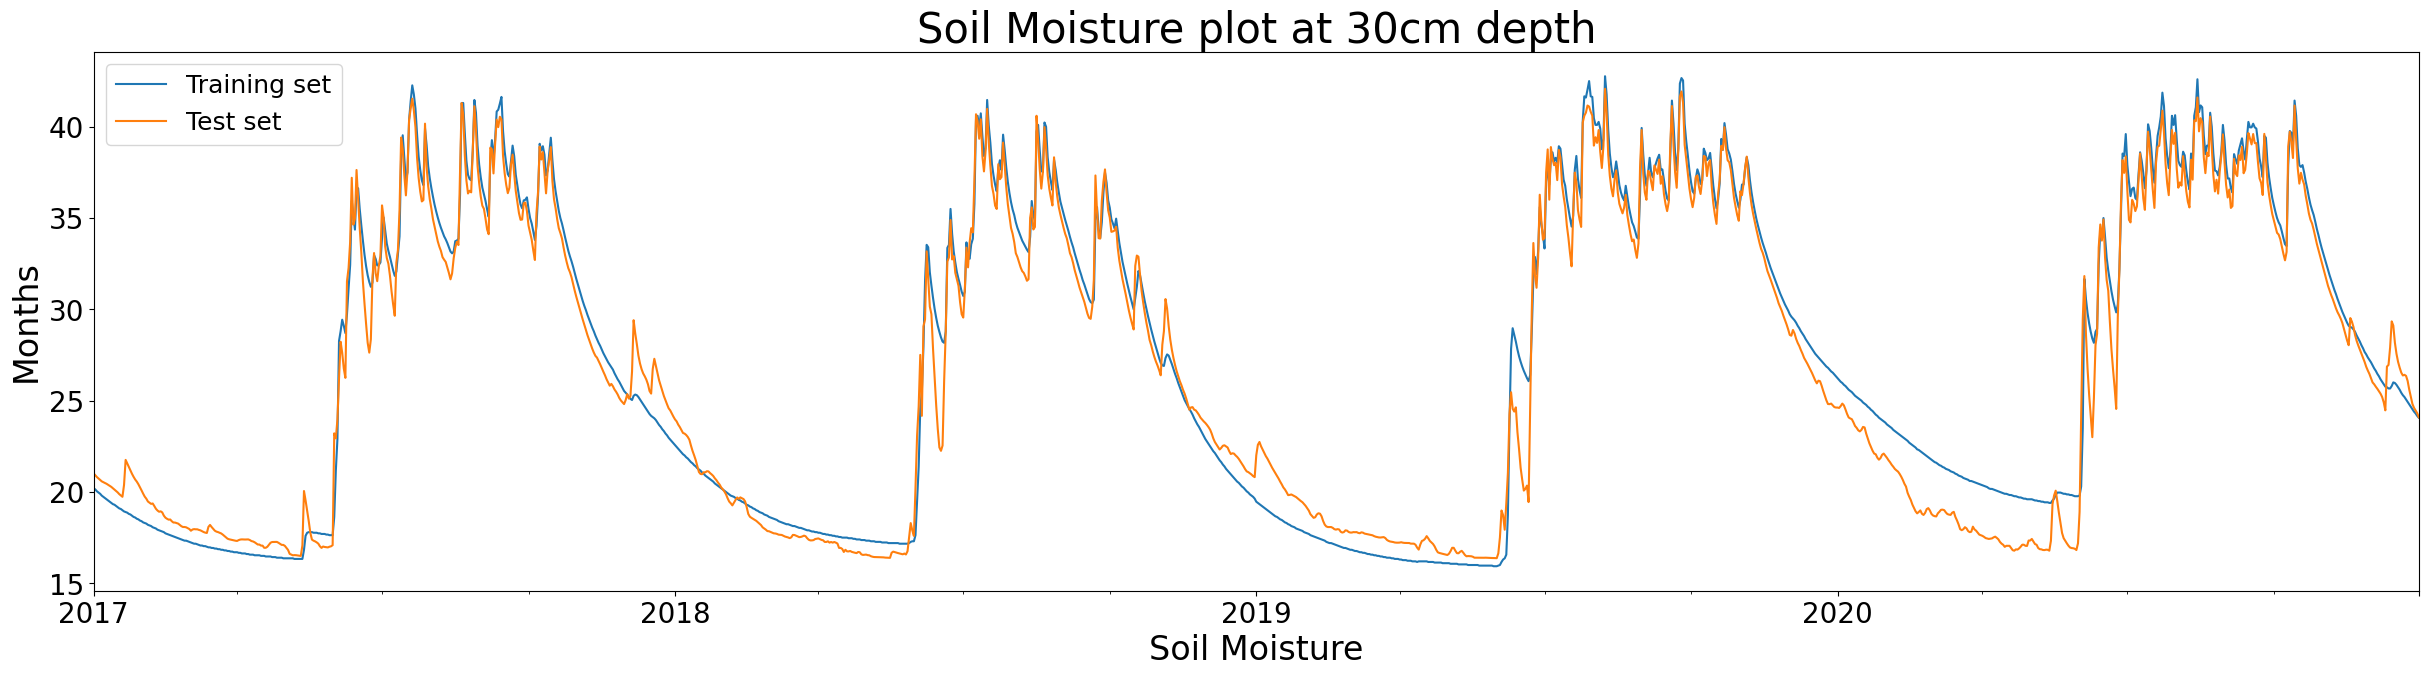

In [28]:
print("----At 30cm ddepth----")

X_train=train[[ 'SM10','St30']]
Y_train = train['SM30']
X_test=test[[  'SM10','St30']]
Y_test = test['SM30']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

fig,ax = plt.subplots(figsize=(30,7))
test['SM30'].plot(ax=ax,label='Observed  soil moisture at 30cm ')
SMP_series.plot(ax=ax,label='predicted  soil moisture at 30cm')
#ax.axvline('2019-01-01',color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=30)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Soil Moisture plot at 30cm depth')
plt.show()

----At 60cm ddepth----


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 149.6398 - mae: 7.7074 - val_loss: 2.2757 - val_mae: 0.9784
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3585 - mae: 0.7186 - val_loss: 1.9841 - val_mae: 0.9818
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2187 - mae: 0.7021 - val_loss: 1.6641 - val_mae: 0.8744
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1145 - mae: 0.6696 - val_loss: 1.7693 - val_mae: 0.9454
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9979 - mae: 0.5918 - val_loss: 1.3158 - val_mae: 0.6712
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9090 - mae: 0.5838 - val_loss: 1.4537 - val_mae: 0.7041
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9351 - mae: 0.5910 - val_loss: 1.3275 - val_mae: 0.7371
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0133 - mae: 0.6085 - val_loss: 1.4288 - val_mae: 0.7208
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

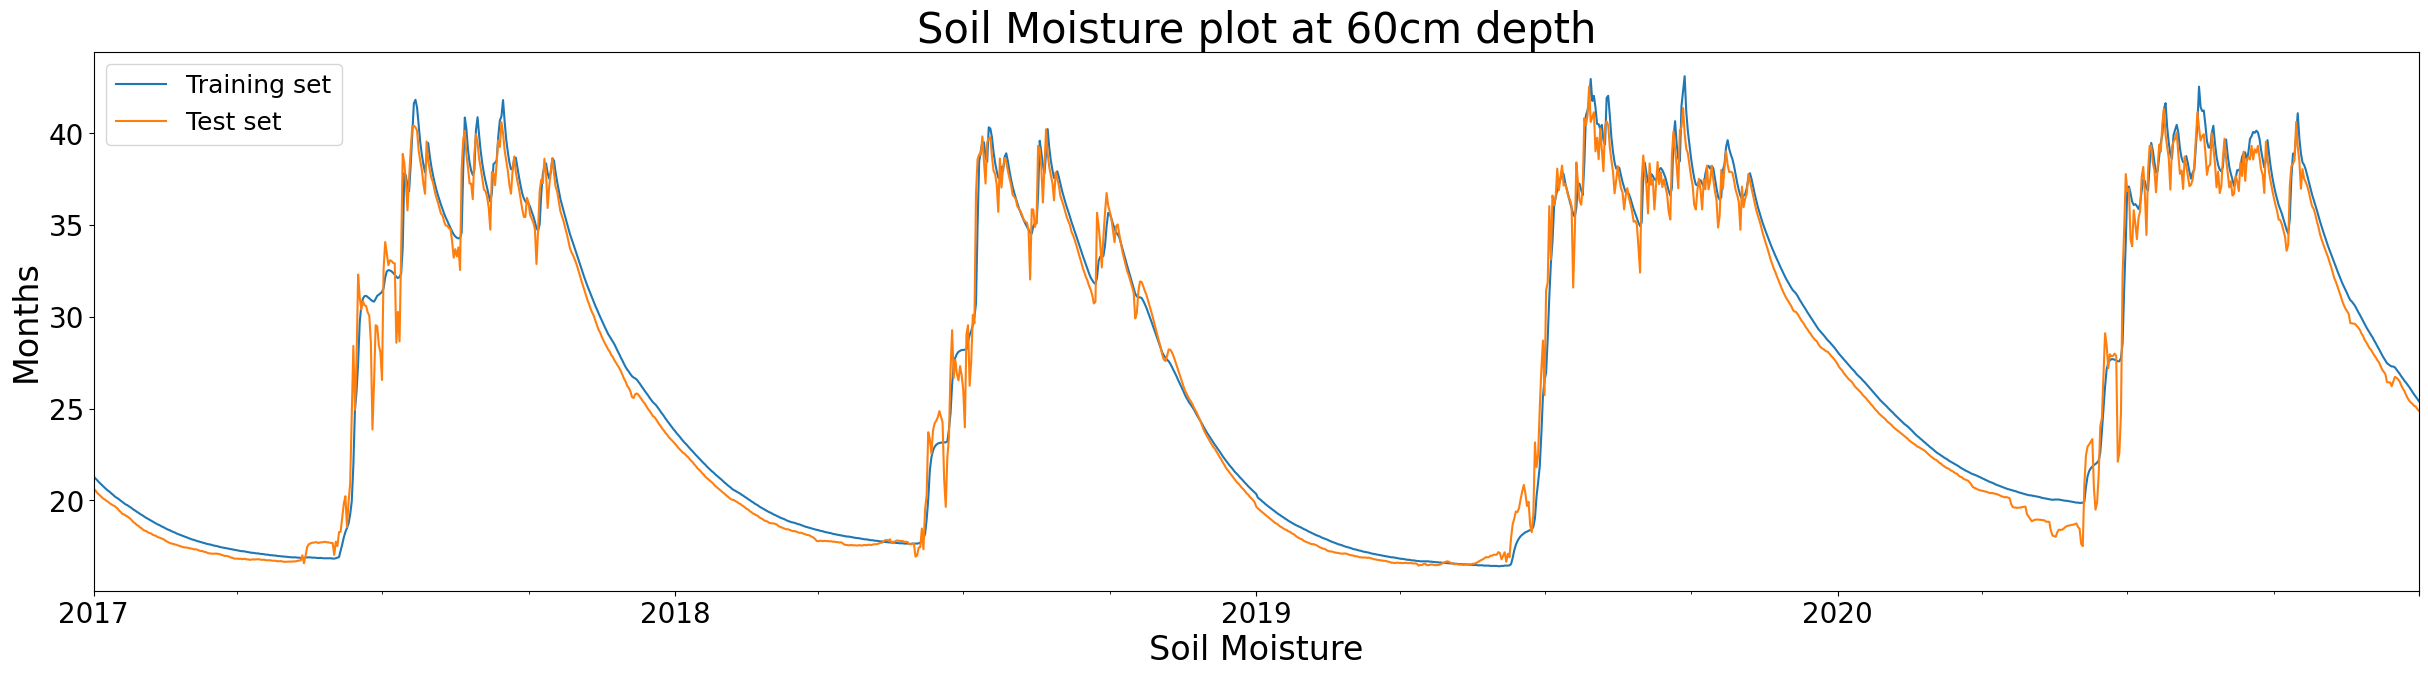

In [29]:

print("----At 60cm ddepth----")

X_train=train[[ 'SM10','St60','SM30']]
Y_train = train['SM60']
X_test=test[[ 'SM10','St60','SM30']]
Y_test = test['SM60']

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

fig,ax = plt.subplots(figsize=(30,7))
test['SM60'].plot(ax=ax,label='Observed soil moisture at 60 cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 60cm')
#ax.axvline('2019-01-01',color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=30)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Soil Moisture plot at 60cm depth')
plt.show()

----At 100cm ddepth----


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_76 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 206.0771 - mae: 9.3117 - val_loss: 1.9664 - val_mae: 0.9991
Epoch 2/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7165 - mae: 0.5844 - val_loss: 0.5981 - val_mae: 0.5135
Epoch 3/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3501 - mae: 0.3922 - val_loss: 0.4380 - val_mae: 0.4495
Epoch 4/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3013 - mae: 0.3740 - val_loss: 0.4518 - val_mae: 0.5086
Epoch 5/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2430 - mae: 0.3394 - val_loss: 0.6721 - val_mae: 0.5458
Epoch 6/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3361 - mae: 0.4097 - val_loss: 0.3720 - val_mae: 0.3815
Epoch 7/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2317 - mae: 0.3255 - val_loss: 0.4398 - val_mae: 0.4683
Epoch 8/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2585 - mae: 0.3474 - val_loss: 0.4128 - val_mae: 0.4427
Epoch 9/20
337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - 

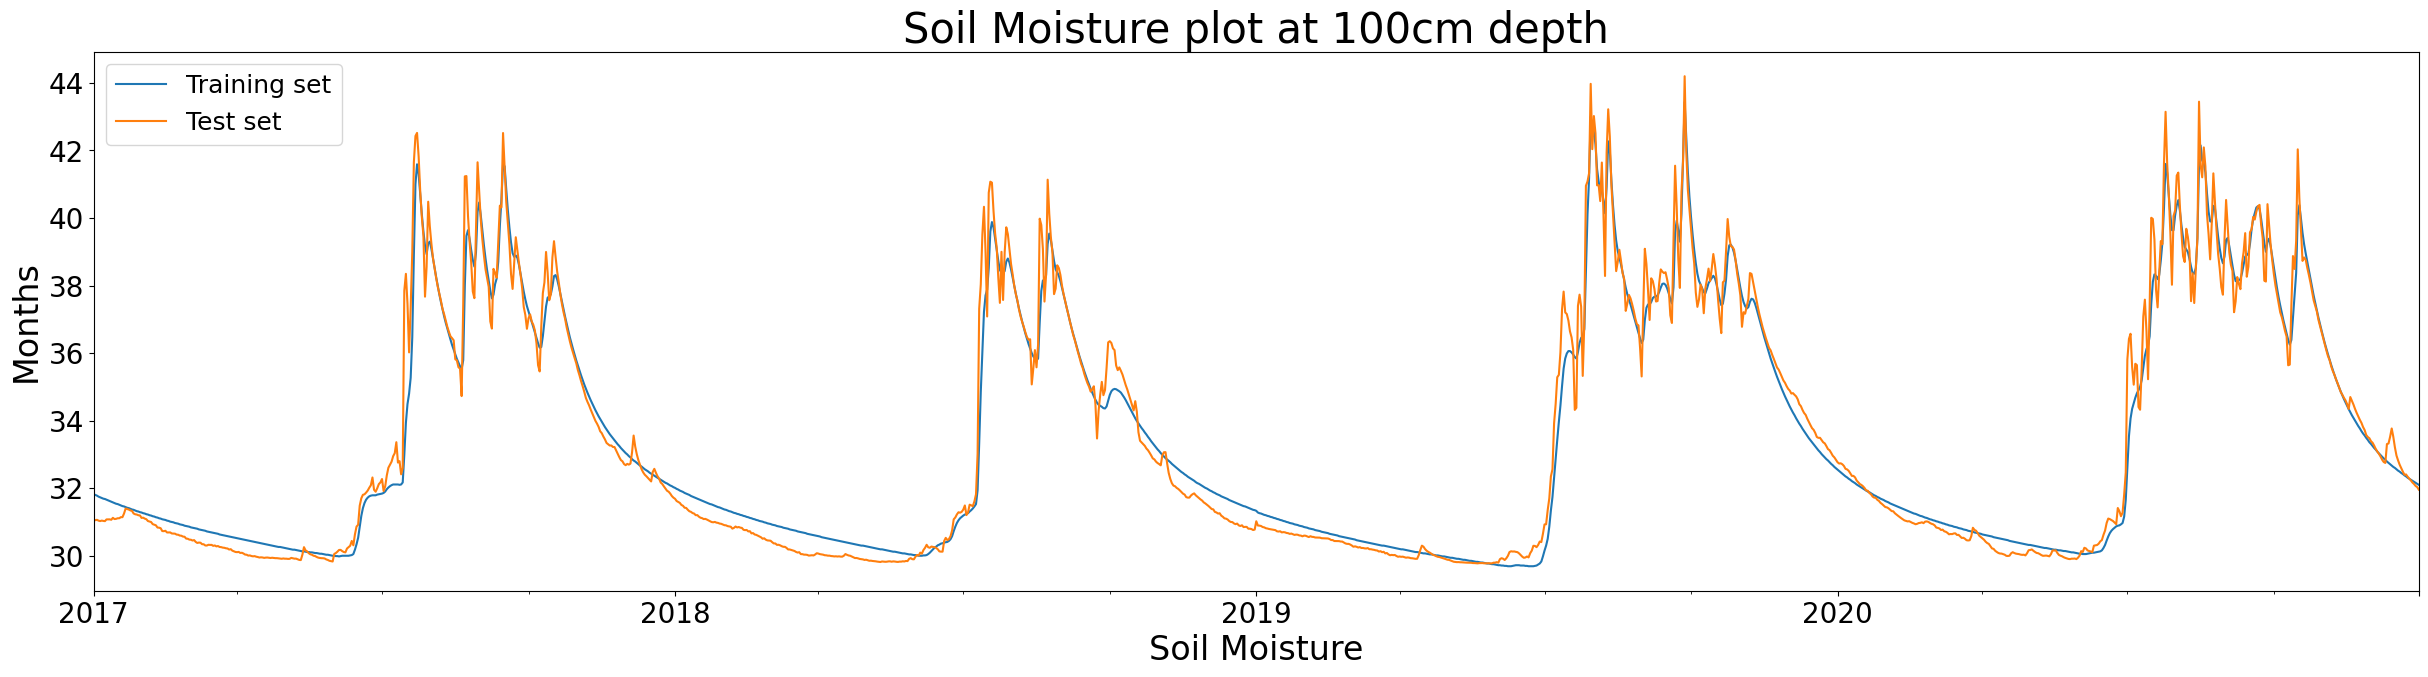

In [30]:
print("----At 100cm ddepth----")

X_train=train[[ 'SM10','SM60','SM30','St100']]
Y_train = train['SM100']
X_test=test[[ 'SM10','SM60','SM30','St100']]
Y_test = test['SM100']


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = Sequential()
model.add(Dense(160, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=20)

SMP = model.predict(X_test)
SMP_series = pd.Series(SMP.flatten(), index=test.index)

fig,ax = plt.subplots(figsize=(30,7))
test['SM100'].plot(ax=ax,label='Observed soil moisture at 100cm')
SMP_series.plot(ax=ax,label='predicted soil moisture at 100cm')
#ax.axvline('2019-01-01',color='black',ls='--')
ax.legend(['Training set','Test set'])
plt.rc('font', size=14)          
plt.rc('axes', titlesize=30)     
plt.rc('axes', labelsize=24)     
plt.rc('xtick', labelsize=20)    
plt.rc('ytick', labelsize=20)    
plt.rc('legend', fontsize=18)    
plt.rc('figure', titlesize=30)
plt.xlabel('Soil Moisture')
plt.ylabel('Months')
plt.title('Soil Moisture plot at 100cm depth')
plt.show()
